In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load in the dataframe

In [2]:
df = pd.read_pickle('./main_df.pkl')
print(df.shape)
df.head()

(2213180, 11)


,#virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish
0,NC_010363,NC_008527,60.8,NaN,0.021973,NaN,0.002122,0.398421,0.382144,NaN,-1.33553
1,NC_010363,NC_002662,59.0,NaN,0.016709,NaN,0.001929,0.397773,0.377498,NaN,-1.33035
2,NC_010363,NC_017949,59.0,NaN,0.020818,NaN,0.002088,0.396969,0.379686,NaN,-1.33341
3,NC_010363,NC_017492,59.0,NaN,0.022209,NaN,0.002131,0.396148,0.380930,NaN,-1.33767
4,NC_010363,NC_009004,59.0,NaN,0.020871,NaN,0.002088,0.397095,0.379834,NaN,-1.33341


### Load in the taxonomy JSONs

In [3]:
import json
import pathlib

orgs = {}
for file in pathlib.Path('./taxonomy/').iterdir():
    with open(file, 'r') as open_file:
        orgs[file.stem] = json.load(open_file)
        
orgs.keys()

dict_keys(['host', 'virus'])

### Find labels (which viruses infect which hosts in nature)

In [4]:
df['y'] = df.apply(lambda row: 1 if orgs['host'][row['host']]['lineage_names'][-1] == orgs['virus'][row['#virus']]['host']['lineage_names'][-1] else 0, axis=1)


Number of positive cases:

In [5]:
len(df[df['y'] == 1].index)

16757

Number of negative cases:

In [6]:
len(df[df['y'] == 0].index)

2196423

### Get all of positive cases + the same number of negative cases randomly

In [7]:
learning_df = df[df['y'] == 1]
negative_learning_df = df[df['y'] == 0].sample(n=len(df[df['y'] == 1].index))

learning_df = learning_df.append(negative_learning_df)
print(learning_df.shape)
learning_df.head()

(33514, 12)


,#virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,y
0,NC_010363,NC_008527,60.8,NaN,0.021973,NaN,0.002122,0.398421,0.382144,NaN,-1.33553,1
1,NC_010363,NC_002662,59.0,NaN,0.016709,NaN,0.001929,0.397773,0.377498,NaN,-1.33035,1
2,NC_010363,NC_017949,59.0,NaN,0.020818,NaN,0.002088,0.396969,0.379686,NaN,-1.33341,1
3,NC_010363,NC_017492,59.0,NaN,0.022209,NaN,0.002131,0.396148,0.380930,NaN,-1.33767,1
4,NC_010363,NC_009004,59.0,NaN,0.020871,NaN,0.002088,0.397095,0.379834,NaN,-1.33341,1


### fillna - FILLING WITH mean() SEEMS LIKE A REALLY BAD IDEA

In [8]:
filled_df = learning_df.fillna(learning_df.mean())

### Encode categorical values

In [9]:
transformed_data = pd.get_dummies(filled_df, columns=['#virus', 'host'])
transformed_data

,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,y,...,host_NC_023073,host_NC_023075,host_NC_023076,host_NC_023134,host_NC_023135,host_NC_023137,host_NC_023149,host_NC_023150,host_NC_023151,host_NZ_AP012548
0,60.800000,2.124726,0.021973,4868.559584,0.002122,0.398421,0.382144,1.980998,-1.33553,1,...,0,0,0,0,0,0,0,0,0,0
1,59.000000,2.124726,0.016709,4868.559584,0.001929,0.397773,0.377498,1.980998,-1.33035,1,...,0,0,0,0,0,0,0,0,0,0
2,59.000000,2.124726,0.020818,4868.559584,0.002088,0.396969,0.379686,1.980998,-1.33341,1,...,0,0,0,0,0,0,0,0,0,0
3,59.000000,2.124726,0.022209,4868.559584,0.002131,0.396148,0.380930,1.980998,-1.33767,1,...,0,0,0,0,0,0,0,0,0,0
4,59.000000,2.124726,0.020871,4868.559584,0.002088,0.397095,0.379834,1.980998,-1.33341,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415604,4141.843844,2.124726,0.026816,4868.559584,0.004274,0.339238,0.347701,1.980998,-1.35061,0,...,0,0,0,0,0,0,0,0,0,0
1396738,4141.843844,2.124726,0.219489,4868.559584,0.004226,1.240329,1.124766,1.980998,-1.44195,0,...,0,0,0,0,0,0,0,0,0,0
1442024,4141.843844,2.124726,0.394836,4868.559584,0.007146,1.452163,1.598329,1.980998,-1.45462,0,...,0,0,0,0,0,0,0,0,0,0
1598882,4141.843844,2.124726,0.159401,4868.559584,0.004010,0.760155,0.740926,1.980998,-1.42008,0,...,0,0,0,0,0,0,0,0,0,0


### Extract X and y arrays

In [10]:
X = transformed_data.drop('y', axis=1).values
y = transformed_data['y'].values
print(X[0])
y

[6.08000000e+01 2.12472648e+00 2.19727602e-02 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### test_train_split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

### Feature scaling (if necessary) 

### Train the Random Forst Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predict Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Score the model - Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3254  134]
 [ 102 3213]]


0.9647918842309414

### ROC curve

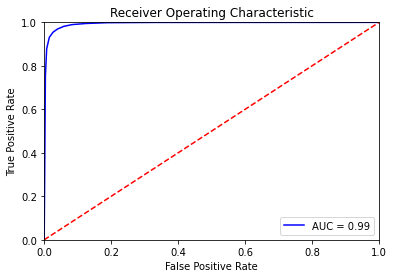

In [15]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC curve is a bad metric in this case – use F1 (harmonic mean of Precision & Recall) instead